# 1. Cleaning Data

### Importation des bibliothèques pandas et datetime

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

### Chargement des données depuis un fichier CSV

In [2]:
data = pd.read_csv("hotel.csv")

### Affichage des noms des colonnes

In [3]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

### Affichage des 10 premières lignes

In [4]:
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


### Sélection des colonnes à supprimer

In [5]:
cols_to_drop = ['arrival_date_week_number', 'babies', 'distribution_channel', \
                'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', \
                'deposit_type', 'agent', 'company', 'required_car_parking_spaces', \
                'total_of_special_requests', 'reservation_status', 'reservation_status_date']
data_clean = data.drop(cols_to_drop, axis=1)
# Suppression des colonnes inutiles
del cols_to_drop 

### Affichage des informations sur le data nettoyé

In [6]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   hotel                      119390 non-null  object 
 1   is_canceled                119390 non-null  int64  
 2   lead_time                  119390 non-null  int64  
 3   arrival_date_year          119390 non-null  int64  
 4   arrival_date_month         119390 non-null  object 
 5   arrival_date_day_of_month  119390 non-null  int64  
 6   stays_in_weekend_nights    119390 non-null  int64  
 7   stays_in_week_nights       119390 non-null  int64  
 8   adults                     119390 non-null  int64  
 9   children                   119386 non-null  float64
 10  meal                       119390 non-null  object 
 11  country                    118902 non-null  object 
 12  market_segment             119390 non-null  object 
 13  is_repeated_guest          11

### Recherche de valeurs négatives dans la colonne 'adr'

In [7]:
data_clean[data_clean['adr']<=0]['adr'].value_counts()

adr
 0.00    1959
-6.38       1
Name: count, dtype: int64

### Recherche de valeurs négatives dans la colonne 'adr' et de leur impact sur 'is_canceled'

In [8]:
data_clean[data_clean['adr']<=0]['is_canceled'].value_counts()

is_canceled
0    1747
1     213
Name: count, dtype: int64

### Suppression des lignes contenant des valeurs manquantes (NaN) et affichage de s infos

In [9]:
data_clean.dropna(inplace=True)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   hotel                      118898 non-null  object 
 1   is_canceled                118898 non-null  int64  
 2   lead_time                  118898 non-null  int64  
 3   arrival_date_year          118898 non-null  int64  
 4   arrival_date_month         118898 non-null  object 
 5   arrival_date_day_of_month  118898 non-null  int64  
 6   stays_in_weekend_nights    118898 non-null  int64  
 7   stays_in_week_nights       118898 non-null  int64  
 8   adults                     118898 non-null  int64  
 9   children                   118898 non-null  float64
 10  meal                       118898 non-null  object 
 11  country                    118898 non-null  object 
 12  market_segment             118898 non-null  object 
 13  is_repeated_guest          118898 

### Conversion de la colonne 'children' en type entier

In [10]:
data_clean['children'].astype('int64')

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: children, Length: 118898, dtype: int64

### Création d'une nouvelle colonne 'guest_number' en combinant 'adults' et 'children'

In [11]:
data_clean['guest_number'] = data_clean['adults'] + data_clean['children']

In [12]:
data_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,market_segment,is_repeated_guest,reserved_room_type,assigned_room_type,days_in_waiting_list,customer_type,adr,guest_number
0,Resort Hotel,0,342,2015,July,1,0,0,2,0.0,BB,PRT,Direct,0,C,C,0,Transient,0.0,2.0
1,Resort Hotel,0,737,2015,July,1,0,0,2,0.0,BB,PRT,Direct,0,C,C,0,Transient,0.0,2.0
2,Resort Hotel,0,7,2015,July,1,0,1,1,0.0,BB,GBR,Direct,0,A,C,0,Transient,75.0,1.0
3,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,BB,GBR,Corporate,0,A,A,0,Transient,75.0,1.0
4,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,BB,GBR,Online TA,0,A,A,0,Transient,98.0,2.0


### Calcul de la somme des nuits passées le week-end et en semaine

In [13]:
data_clean['stay_length'] = data_clean['stays_in_weekend_nights'] + data_clean['stays_in_week_nights']
data_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,country,market_segment,is_repeated_guest,reserved_room_type,assigned_room_type,days_in_waiting_list,customer_type,adr,guest_number,stay_length
0,Resort Hotel,0,342,2015,July,1,0,0,2,0.0,...,PRT,Direct,0,C,C,0,Transient,0.0,2.0,0
1,Resort Hotel,0,737,2015,July,1,0,0,2,0.0,...,PRT,Direct,0,C,C,0,Transient,0.0,2.0,0
2,Resort Hotel,0,7,2015,July,1,0,1,1,0.0,...,GBR,Direct,0,A,C,0,Transient,75.0,1.0,1
3,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,...,GBR,Corporate,0,A,A,0,Transient,75.0,1.0,1
4,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,...,GBR,Online TA,0,A,A,0,Transient,98.0,2.0,2


### Suppression des colonnes 'adults', 'children', 'stays_in_weekend_nights', 'stays_in_week_nights'

In [14]:
data_clean.drop(['adults', 'children', 'stays_in_weekend_nights', 'stays_in_week_nights'], axis=1, inplace=True)
data_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,meal,country,market_segment,is_repeated_guest,reserved_room_type,assigned_room_type,days_in_waiting_list,customer_type,adr,guest_number,stay_length
0,Resort Hotel,0,342,2015,July,1,BB,PRT,Direct,0,C,C,0,Transient,0.0,2.0,0
1,Resort Hotel,0,737,2015,July,1,BB,PRT,Direct,0,C,C,0,Transient,0.0,2.0,0
2,Resort Hotel,0,7,2015,July,1,BB,GBR,Direct,0,A,C,0,Transient,75.0,1.0,1
3,Resort Hotel,0,13,2015,July,1,BB,GBR,Corporate,0,A,A,0,Transient,75.0,1.0,1
4,Resort Hotel,0,14,2015,July,1,BB,GBR,Online TA,0,A,A,0,Transient,98.0,2.0,2


### Comptage des occurrences de 'guest_number'

In [15]:
data_clean['guest_number'].value_counts(ascending=False)

guest_number
2.0     82594
1.0     22299
3.0      9919
4.0      3797
0.0       170
5.0       104
26.0        5
27.0        2
20.0        2
12.0        1
40.0        1
50.0        1
55.0        1
6.0         1
10.0        1
Name: count, dtype: int64

### Suppression des entrées avec 'guest_number' égal à 0

In [16]:
#lenna 170 wehed aandou 0 w eli houwa mech nrml donc on le supprime
data_clean.drop(data_clean[data_clean['guest_number']==0].index, inplace=True)

### Comptage des occurrences de 'guest_number'

In [17]:
data_clean['guest_number'].value_counts(ascending=False)

guest_number
2.0     82594
1.0     22299
3.0      9919
4.0      3797
5.0       104
26.0        5
27.0        2
20.0        2
12.0        1
40.0        1
50.0        1
55.0        1
6.0         1
10.0        1
Name: count, dtype: int64

### Comptage des occurrences de 'stay_length'

In [18]:
data_clean['stay_length'].value_counts(ascending=False)

stay_length
2     27518
3     27013
1     20781
4     17353
7      8626
5      7752
6      3839
8      1151
10     1131
14      910
9       837
0       640
11      392
12      220
13      139
21       71
15       71
16       40
25       37
18       35
28       34
19       22
17       20
20       14
29       13
30       13
22       13
23        8
26        6
24        6
35        5
42        4
27        4
33        3
56        2
45        1
38        1
46        1
48        1
34        1
Name: count, dtype: int64

### Recherche de séjours de longueur nulle ('stay_length') et leur impact sur 'is_canceled'

In [19]:
data_clean[data_clean['stay_length']==0]['is_canceled'].value_counts()

is_canceled
0    617
1     23
Name: count, dtype: int64

### Suppression des entrées avec 'stay_length' égal à 0

In [20]:
#lena 600 w chwaya longueur de séjour 0 5ater 3amlou annulation awka 3leh fasa5thom
data_clean.drop(data_clean[data_clean['stay_length']==0].index, inplace=True)
data_clean['stay_length'].value_counts(ascending=False)

stay_length
2     27518
3     27013
1     20781
4     17353
7      8626
5      7752
6      3839
8      1151
10     1131
14      910
9       837
11      392
12      220
13      139
21       71
15       71
16       40
25       37
18       35
28       34
19       22
17       20
20       14
29       13
30       13
22       13
23        8
26        6
24        6
35        5
42        4
27        4
33        3
56        2
45        1
38        1
46        1
48        1
34        1
Name: count, dtype: int64

### Suppression des entrées avec 'adr' négatif ou nul

In [21]:
data_clean.drop(data_clean[data_clean['adr']<=0].index, inplace=True)
data_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,meal,country,market_segment,is_repeated_guest,reserved_room_type,assigned_room_type,days_in_waiting_list,customer_type,adr,guest_number,stay_length
2,Resort Hotel,0,7,2015,July,1,BB,GBR,Direct,0,A,C,0,Transient,75.0,1.0,1
3,Resort Hotel,0,13,2015,July,1,BB,GBR,Corporate,0,A,A,0,Transient,75.0,1.0,1
4,Resort Hotel,0,14,2015,July,1,BB,GBR,Online TA,0,A,A,0,Transient,98.0,2.0,2
5,Resort Hotel,0,14,2015,July,1,BB,GBR,Online TA,0,A,A,0,Transient,98.0,2.0,2
6,Resort Hotel,0,0,2015,July,1,BB,PRT,Direct,0,C,C,0,Transient,107.0,2.0,2


### Conversion du mois de texte en format numérique

In [22]:
# Ce dictionnaire 'month_map' est utilisé pour mapper les noms des mois aux numéros de mois correspondants.
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, \
            'September': 9, 'October': 10, 'November': 11, 'December': 12}

# Cette ligne de code applique la correspondance entre les noms des mois dans la colonne 'arrival_date_month' du DataFrame 'data_clean'
# et les numéros de mois du dictionnaire 'month_map'. Cela permet de convertir les mois en valeurs numériques.
data_clean['arrival_date_month'] = data_clean['arrival_date_month'].map(month_map)

data_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,meal,country,market_segment,is_repeated_guest,reserved_room_type,assigned_room_type,days_in_waiting_list,customer_type,adr,guest_number,stay_length
2,Resort Hotel,0,7,2015,7,1,BB,GBR,Direct,0,A,C,0,Transient,75.0,1.0,1
3,Resort Hotel,0,13,2015,7,1,BB,GBR,Corporate,0,A,A,0,Transient,75.0,1.0,1
4,Resort Hotel,0,14,2015,7,1,BB,GBR,Online TA,0,A,A,0,Transient,98.0,2.0,2
5,Resort Hotel,0,14,2015,7,1,BB,GBR,Online TA,0,A,A,0,Transient,98.0,2.0,2
6,Resort Hotel,0,0,2015,7,1,BB,PRT,Direct,0,C,C,0,Transient,107.0,2.0,2


### Création d'une colonne 'date' en combinant 'arrival_date_year', 'arrival_date_month', et 'arrival_date_day_of_month'

In [23]:
data_clean['arrival_date_year'] = data_clean['arrival_date_year'].astype('string')
data_clean['arrival_date_month'] = data_clean['arrival_date_month'].astype('string')
data_clean['arrival_date_day_of_month'] = data_clean['arrival_date_day_of_month'].astype('string')
# Cette ligne de code crée une nouvelle colonne 'date' dans le DataFrame 'data_clean' en combinant les colonnes 'arrival_date_year', 'arrival_date_month' 
# et 'arrival_date_day_of_month' en utilisant des '/' comme séparateurs. Le résultat est une colonne 'date' qui représente la date d'arrivée sous forme de chaîne de caractères.
data_clean['date'] = data_clean['arrival_date_year'] + '/' + data_clean['arrival_date_month'] + '/' + \
                    data_clean[ 'arrival_date_day_of_month']
data_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,meal,country,market_segment,is_repeated_guest,reserved_room_type,assigned_room_type,days_in_waiting_list,customer_type,adr,guest_number,stay_length,date
2,Resort Hotel,0,7,2015,7,1,BB,GBR,Direct,0,A,C,0,Transient,75.0,1.0,1,2015/7/1
3,Resort Hotel,0,13,2015,7,1,BB,GBR,Corporate,0,A,A,0,Transient,75.0,1.0,1,2015/7/1
4,Resort Hotel,0,14,2015,7,1,BB,GBR,Online TA,0,A,A,0,Transient,98.0,2.0,2,2015/7/1
5,Resort Hotel,0,14,2015,7,1,BB,GBR,Online TA,0,A,A,0,Transient,98.0,2.0,2,2015/7/1
6,Resort Hotel,0,0,2015,7,1,BB,PRT,Direct,0,C,C,0,Transient,107.0,2.0,2,2015/7/1


### Conversion de la colonne 'date' en format de date datetime

In [24]:
# conversion des dates au format 'AAAA/MM/JJ en objets de date. Pour ce faire, il divise chaque date en ses composants (année, mois, jour), 
#les convertit en entiers, puis les combine pour créer des objets de date
def convert_dt(cell):
    tmp = cell.split('/')
    tmp2 = [int(tt) for tt in tmp]
    return dt.datetime(tmp2[0], tmp2[1], tmp2[2])

data_clean['date'] = data_clean['date'].apply(convert_dt)
data_clean['date'].head()

2   2015-07-01
3   2015-07-01
4   2015-07-01
5   2015-07-01
6   2015-07-01
Name: date, dtype: datetime64[ns]

### Filtrage des données

In [25]:
# Limit the analysis to exactly two years: from 1 July 2015 to 1 July 2017
data_clean.drop(data_clean[data_clean['date']>dt.datetime(2017, 6, 30)].index, inplace=True)

### Attribution des valeurs numériques '1' et '2' pour l'année d'arrivée (1 pour la première année, 2 pour la deuxième)

In [26]:
#Attribution des valeurs numériques '1' et '2' pour l'année d'arrivée (1 pour la première année, 2 pour la deuxième)
data_clean['arrival_date_year'][(data_clean['date']>=dt.datetime(2015, 7, 1)) & (data_clean['date']<=dt.datetime(2016, 6, 30))] = '1'
data_clean['arrival_date_year'][(data_clean['date']>=dt.datetime(2016, 7, 1)) & (data_clean['date']<=dt.datetime(2017, 6, 30))] = '2'


In [27]:
data_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,meal,country,market_segment,is_repeated_guest,reserved_room_type,assigned_room_type,days_in_waiting_list,customer_type,adr,guest_number,stay_length,date
2,Resort Hotel,0,7,1,7,1,BB,GBR,Direct,0,A,C,0,Transient,75.0,1.0,1,2015-07-01
3,Resort Hotel,0,13,1,7,1,BB,GBR,Corporate,0,A,A,0,Transient,75.0,1.0,1,2015-07-01
4,Resort Hotel,0,14,1,7,1,BB,GBR,Online TA,0,A,A,0,Transient,98.0,2.0,2,2015-07-01
5,Resort Hotel,0,14,1,7,1,BB,GBR,Online TA,0,A,A,0,Transient,98.0,2.0,2,2015-07-01
6,Resort Hotel,0,0,1,7,1,BB,PRT,Direct,0,C,C,0,Transient,107.0,2.0,2,2015-07-01


In [28]:
data_clean.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,meal,country,market_segment,is_repeated_guest,reserved_room_type,assigned_room_type,days_in_waiting_list,customer_type,adr,guest_number,stay_length,date
115449,City Hotel,0,43,2,6,29,BB,FRA,Online TA,0,D,D,0,Transient,154.93,3.0,7,2017-06-29
115455,City Hotel,0,245,2,6,29,SC,IRL,Online TA,0,A,A,0,Transient,91.93,2.0,7,2017-06-29
115462,City Hotel,0,175,2,6,29,BB,DEU,Direct,0,A,A,0,Transient,91.93,2.0,7,2017-06-29
115533,City Hotel,0,184,2,6,30,BB,BEL,Online TA,0,A,A,0,Transient,108.51,2.0,7,2017-06-30
115535,City Hotel,0,153,2,6,30,HB,DEU,Online TA,0,D,D,0,Transient,153.51,2.0,7,2017-06-30


### Filtrage des données en fonction du type d'hôtel

In [29]:
# filtre les données pour ne conserver que celles où le type d'hôtel est "Resort Hotel"
resort_h = data_clean[data_clean['hotel']=='Resort Hotel']
#cette ligne filtre les données pour ne conserver que celles où le type d'hôtel est "City Hotel"
city_h = data_clean[data_clean['hotel']=='City Hotel']

### Suppression des colonnes 'index' et 'hotel'

In [30]:
#supprimer la colonne "index" et la colonne "hotel" ... nhotha heading ... 
data_clean = data_clean.reset_index().drop('index', axis=1)
resort_h = resort_h.reset_index().drop(['index', 'hotel'], axis=1)
city_h = city_h.reset_index().drop(['index', 'hotel'], axis=1)

### Ressort Hotel

In [31]:
resort_h.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,meal,country,market_segment,is_repeated_guest,reserved_room_type,assigned_room_type,days_in_waiting_list,customer_type,adr,guest_number,stay_length,date
0,0,7,1,7,1,BB,GBR,Direct,0,A,C,0,Transient,75.0,1.0,1,2015-07-01
1,0,13,1,7,1,BB,GBR,Corporate,0,A,A,0,Transient,75.0,1.0,1,2015-07-01
2,0,14,1,7,1,BB,GBR,Online TA,0,A,A,0,Transient,98.0,2.0,2,2015-07-01
3,0,14,1,7,1,BB,GBR,Online TA,0,A,A,0,Transient,98.0,2.0,2,2015-07-01
4,0,0,1,7,1,BB,PRT,Direct,0,C,C,0,Transient,107.0,2.0,2,2015-07-01


### City Hotel

In [32]:
city_h.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,meal,country,market_segment,is_repeated_guest,reserved_room_type,assigned_room_type,days_in_waiting_list,customer_type,adr,guest_number,stay_length,date
0,1,88,1,7,1,BB,PRT,Online TA,0,A,A,0,Transient,76.5,2.0,4,2015-07-01
1,1,65,1,7,1,BB,PRT,Online TA,0,A,A,0,Transient,68.0,1.0,4,2015-07-01
2,1,92,1,7,1,BB,PRT,Online TA,0,A,A,0,Transient,76.5,2.0,6,2015-07-01
3,1,100,1,7,2,BB,PRT,Online TA,0,A,A,0,Transient,76.5,2.0,2,2015-07-02
4,1,79,1,7,2,BB,PRT,Online TA,0,A,A,0,Transient,76.5,2.0,3,2015-07-02


Juste comptage nnombre d'occurences

In [33]:
data_clean['hotel'].value_counts()

hotel
City Hotel      71430
Resort Hotel    35333
Name: count, dtype: int64

### Analyser le taux d'annulation de réservation

In [34]:
# Cette partie du code crée un fichier Excel nommé 'all_bookings_clean.xlsx' pour stocker les données nettoyées.
# Le fichier Excel est ouvert en mode écriture à l'aide de la bibliothèque pandas (pd.ExcelWriter).
with pd.ExcelWriter('all_bookings_clean.xlsx') as writer:
    # Écrit les données nettoyées du DataFrame 'data_clean' dans une feuille nommée 'data' du fichier Excel.
    data_clean.to_excel(writer, sheet_name='data')
    # Écrit les données du DataFrame 'resort_h' dans une feuille nommée 'rh' du fichier Excel.

# Cette partie du code lit la feuille 'rh' du fichier Excel 'all_bookings_clean.xlsx' en utilisant 'pd.read_excel'.
# Les données de la feuille sont lues dans le DataFrame 'resort_h'.
# Le paramètre 'index_col=0' indique que la première colonne du DataFrame contient les index.
resort_h = pd.read_excel('all_bookings_clean.xlsx', index_col=0, sheet_name='rh')


ValueError: Worksheet named 'rh' not found

In [ ]:
# Cette partie du code calcule le nombre de réservations annulées et non annulées pour le DataFrame 'resort_h'.
# Les résultats sont stockés dans le DataFrame 'cancel_rh', avec le compte de chaque catégorie.
cancel_rh = resort_h['is_canceled'].value_counts().reset_index()

# Cette partie du code prépare les valeurs à afficher dans le diagramme circulaire (camembert).
# Les valeurs sont calculées en divisant le nombre de réservations annulées et non annulées par le total des réservations.
pie_values_rh = [cancel_rh.iloc[0, 1] / cancel_rh['is_canceled'].sum(), cancel_rh.iloc[1, 1] / cancel_rh['is_canceled'].sum()]

# Cette partie du code crée un diagramme circulaire (camembert) pour visualiser la répartition des réservations annulées et non annulées.
# Les couleurs et étiquettes sont définies pour chaque section du camembert.
colors = ['#a1c181', '#619b8a']
labels = ['Not canceled', 'canceled']

# Crée une figure et un axe pour le tracé du camembert, puis ajoute le camembert au subplot.
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(121)
ax.pie(pie_values_rh, labels=labels, autopct='%1.1f%%', colors=colors)
ax.set_title('Resort Hotel')

# Cette partie du code supprime les variables temporaires pour libérer de la mémoire.
del pie_values_rh, labels, fig, ax


# 2.  Regression linéaire multiple

### Chargement des données depuis un fichier CSV 

In [ ]:
dataRg = pd.read_csv('Car_sales.csv')

### Information sur data

In [ ]:
dataRg.info()

### Affichage des 10 premiers lignes de données

In [ ]:
dataRg.head(10)

### affichage des 10 derniers ligens

In [ ]:
dataRg.tail(10)

### Importation des biblio nécessaires

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Charger les données

In [ ]:
# Charger les données
dataRg = pd.read_csv('Car_sales.csv')

### Prétraitement des données

In [ ]:
# Prétraitement des données
# Supprimer les lignes avec des valeurs manquantes
dataRg.dropna(inplace=True)

### Sélectionner les caractéristiques (variables indépendantes) et la cible (variable dépendante)

In [ ]:
# Sélectionner les caractéristiques (variables indépendantes) et la cible (variable dépendante)
X = dataRg[['Price_in_thousands', 'Engine_size', 'Horsepower', 'Curb_weight']]
y = dataRg['Sales_in_thousands']

### Diviser les données en ensembles d'entraînement et de test

In [ ]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Créer le modèle de régression linéaire

In [ ]:
# Créer le modèle de régression linéaire
regressor = LinearRegression()

### Entraîner le modèle sur les données d'entraînement

In [ ]:
# Entraîner le modèle sur les données d'entraînement
regressor.fit(X_train, y_train)

### Faire des prédictions sur l'ensemble de test

In [ ]:
# Faire des prédictions sur l'ensemble de test
y_pred = regressor.predict(X_test)

### Calculer le score du modèle sur les données d'entraînement

In [ ]:
# Calculer le score du modèle sur les données d'entraînement
train_score = regressor.score(X_train, y_train)
print(f"Train Score: {train_score}")

### Visualisation des résultats

In [ ]:
# Visualisation des résultats
plt.scatter(y_test, y_pred, color='red', label='Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', lw=2, linestyle='--', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values')
plt.legend()
plt.show()

# 3. Logistic Regression

In [61]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

## Partie 1 : Exploration des données

In [83]:
# Sélectionnez les variables pertinentes pour le Resort Hotel
features_resort = resort_h[['lead_time', 'meal', 'market_segment', 'reserved_room_type', 'assigned_room_type']]

In [84]:
# Gérez les données catégoriques avec one-hot encoding
features_resort = pd.get_dummies(features_resort, columns=['meal', 'market_segment', 'reserved_room_type', 'assigned_room_type'], drop_first=True)

In [87]:
# La variable cible (y) est 'is_canceled', 1 si la réservation est annulée, 0 sinon
target_resort = resort_h['is_canceled']

In [88]:
# Créez un modèle de régression logistique pour le Resort Hotel
model_resort = LogisticRegression()

## Partie 2 : Entrainement

In [89]:
# Ajustez le modèle aux données d'entraînement du Resort Hotel
model_resort.fit(X_train_resort, y_train_resort)

C:\Users\khaoula tlili\anaconda3\envs\myenv-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Partie 3 : Test

In [90]:
# Faites des prédictions pour le Resort Hotel
y_pred_resort = model_resort.predict(X_test_resort)

In [91]:
# Calculez les probabilités pour la classe positive (1) pour le Resort Hotel
y_pred_prob_resort = model_resort.predict_proba(X_test_resort)[:, 1]


In [92]:
# Évaluez les performances du modèle pour le Resort Hotel
accuracy_resort = accuracy_score(y_test_resort, y_pred_resort)
print("Précision du modèle pour le Resort Hotel : {:.2f}%".format(accuracy_resort * 100))

Précision du modèle pour le Resort Hotel : 74.52%


In [93]:
conf_matrix_resort = confusion_matrix(y_test_resort, y_pred_resort)
print("Matrice de confusion pour le Resort Hotel :")
print(conf_matrix_resort)

Matrice de confusion pour le Resort Hotel :
[[4825  343]
 [1458  441]]


In [94]:
class_report_resort = classification_report(y_test_resort, y_pred_resort)
print("Rapport de classification pour le Resort Hotel :")
print(class_report_resort)

Rapport de classification pour le Resort Hotel :
              precision    recall  f1-score   support

           0       0.77      0.93      0.84      5168
           1       0.56      0.23      0.33      1899

    accuracy                           0.75      7067
   macro avg       0.67      0.58      0.59      7067
weighted avg       0.71      0.75      0.70      7067



In [95]:
# Calcul de la courbe ROC pour le Resort Hotel
fpr_resort, tpr_resort, thresholds_resort = roc_curve(y_test_resort, y_pred_prob_resort)


In [96]:
# Calcul de l'aire sous la courbe ROC pour le Resort Hotel
roc_auc_resort = roc_auc_score(y_test_resort, y_pred_prob_resort)


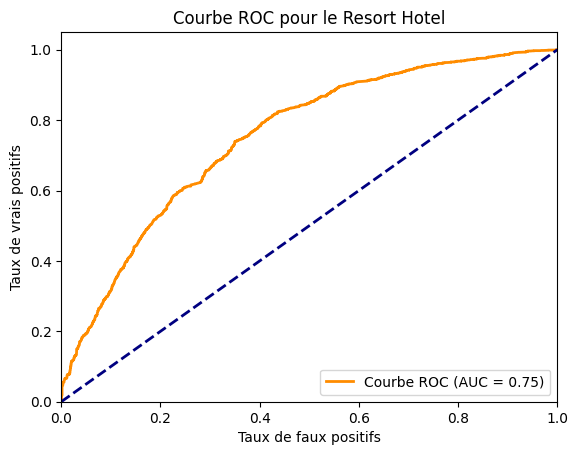

In [97]:
# Tracage de la courbe ROC pour le Resort Hotel
plt.figure()
plt.plot(fpr_resort, tpr_resort, color='darkorange', lw=2, label='Courbe ROC (AUC = {:.2f})'.format(roc_auc_resort))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC pour le Resort Hotel')
plt.legend(loc='lower right')
plt.show()